# Loan Application Status Prediction Project

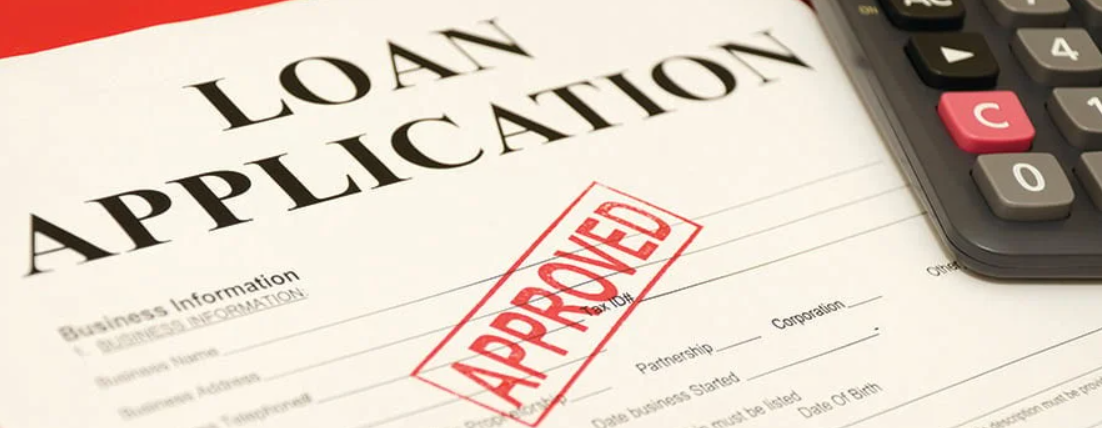

Dataset  

    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


Input features

    1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
    2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
    3.	Married - This refers to applicant being in a state of matrimony
    4.	Dependents - This refres to persons who depends on the applicants for survival
    5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
    6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
    7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
    8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
    9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
    10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
    11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
    12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.



Output label  
    
    Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
    

Aim: 
 
    Develop machine learning models to predict whether the loan of the applicant will be approved (Loan_status) or not, on the basis of the details provided in the dataset(Classification model).

In [102]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [103]:
# load the dataset

loan=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv")
loan.columns=['loan_id','gender','married','dependents','education','self_employed','appl_income','coappl_income','amount',
                         'amount_term','credit_history','property_area','status']
loan.head()

,loan_id,gender,married,dependents,education,self_employed,appl_income,coappl_income,amount,amount_term,credit_history,property_area,status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Data pre-processing, Feature engineering & EDA

In [104]:
# create a copy of the dataset for analysis

loan_df1=loan.copy()

In [105]:
loan_df1.shape

(613, 13)

In [106]:
# check for duplicates

duplicates=loan_df1.duplicated()

print('No. of duplicates in the dataset: ', loan_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', loan_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [107]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_id         613 non-null    object 
 1   gender          600 non-null    object 
 2   married         610 non-null    object 
 3   dependents      598 non-null    object 
 4   education       613 non-null    object 
 5   self_employed   581 non-null    object 
 6   appl_income     613 non-null    int64  
 7   coappl_income   613 non-null    float64
 8   amount          592 non-null    float64
 9   amount_term     599 non-null    float64
 10  credit_history  563 non-null    float64
 11  property_area   613 non-null    object 
 12  status          613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [108]:
# check number of unique values in each column

unique=loan_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
loan_id,613
gender,2
married,2
dependents,4
education,2
self_employed,2
appl_income,504
coappl_income,287
amount,203
amount_term,10


In [109]:
# take the count of each unique value in each column

for i in loan_df1.columns:
    print(loan_df1.value_counts(loan_df1[i]),'\n')

loan_id
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64 

gender
Male      488
Female    112
Name: count, dtype: int64 

married
Yes    398
No     212
Name: count, dtype: int64 

dependents
0     344
1     102
2     101
3+     51
Name: count, dtype: int64 

education
Graduate        479
Not Graduate    134
Name: count, dtype: int64 

self_employed
No     499
Yes     82
Name: count, dtype: int64 

appl_income
2500     9
2600     6
4583     6
6000     6
5000     5
        ..
3246     1
3244     1
3237     1
3232     1
81000    1
Name: count, Length: 504, dtype: int64 

coappl_income
0.0        272
2083.0       5
2500.0       5
1666.0       5
1750.0       3
          ... 
1911.0       1
1915.0       1
1929.0       1
1964.0       1
41667.0      1
Name: count, Length: 287, dtype: int64 

amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0 

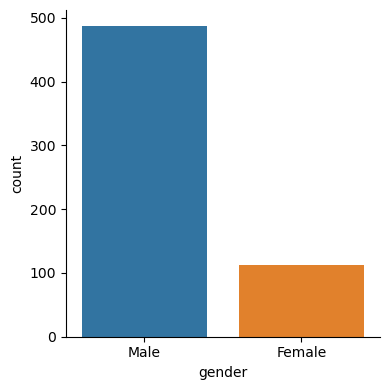

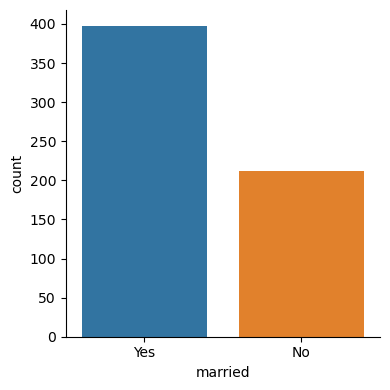

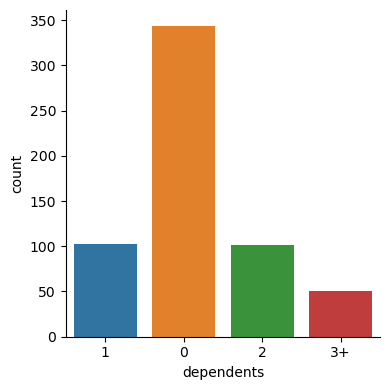

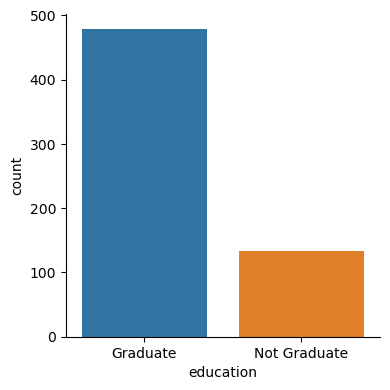

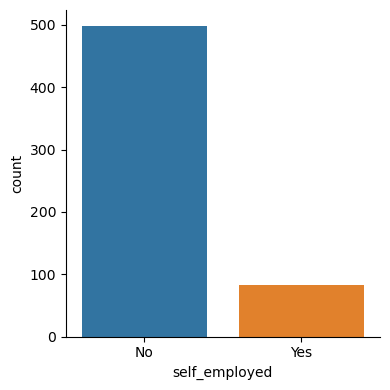

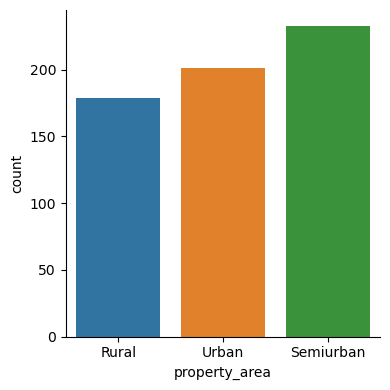

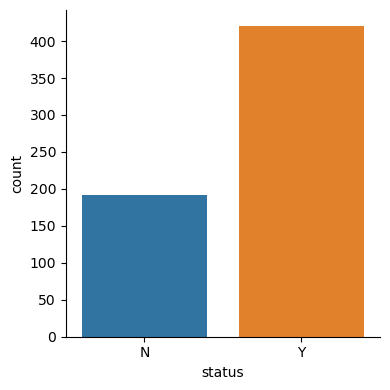

In [110]:
# view the frequency of categorical features

cat=loan_df1.select_dtypes(include='object')
cat1=cat.drop('loan_id',axis=1)
for col in cat1.columns:
    sns.catplot(x=col,data=loan_df1,kind='count',height=4)
    plt.show()

Observation:  

    There are 614 unique loan_ids
    Dataset represents male population more than female
    Majority loan applicants are married
    344 loan applicants doesnt have any dependancies
    479 loan applicants are graduates
    272 of the loan applicants doesnot have any income
    120.0 is the most common loan amount and common amount term is 360 
    Majority of the loan applicants (474) have good credit history 
    Most loan applicants live in the Semi-urban area

In [111]:
loan_df1.describe()

,appl_income,coappl_income,amount,amount_term,credit_history
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation:  

    Average loan applicant income is 5402.73
    Average coapplicant income is 1623.89
    Average loan amount is 146.41
    Average loan amount term is 341.96

In [112]:
# check for nulls

loan_df1.isnull().sum()

loan_id            0
gender            13
married            3
dependents        15
education          0
self_employed     32
appl_income        0
coappl_income      0
amount            21
amount_term       14
credit_history    50
property_area      0
status             0
dtype: int64

Observation:  

    There are 613 records in the dataset with 13 columns 
    There are nulls observed in 7 columns in the dataset  
    The 13 columns have these datatypes: float64(4), int64(1), object(8)

In [113]:
# fill nulls with mode

loan_df1['gender'].fillna(loan_df1['gender'].mode()[0],inplace=True)
loan_df1['married'].fillna(loan_df1['married'].mode()[0],inplace=True)
loan_df1['dependents'].fillna(loan_df1['dependents'].mode()[0],inplace=True)
loan_df1['self_employed'].fillna(loan_df1['self_employed'].mode()[0],inplace=True)
loan_df1['amount'].fillna(loan_df1['amount'].median(),inplace=True)
loan_df1['amount_term'].fillna(loan_df1['amount_term'].median(),inplace=True)
loan_df1['credit_history'].fillna(loan_df1['credit_history'].mode()[0],inplace=True)


In [114]:
# check for nulls after imputation

loan_df1.isnull().sum()

loan_id           0
gender            0
married           0
dependents        0
education         0
self_employed     0
appl_income       0
coappl_income     0
amount            0
amount_term       0
credit_history    0
property_area     0
status            0
dtype: int64

Observation:  

    All nulls have been handled

In [117]:
# find loan id and details of the applicant who has availed for highest loan amount

high_amt=loan_df1[loan_df1['amount']==loan_df1['amount'].max()]
high_amt

,loan_id,gender,married,dependents,education,self_employed,appl_income,coappl_income,amount,amount_term,credit_history,property_area,status
170,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


In [118]:
# find loan id and details of the applicant who has availed for lowest loan amount

low_amt=loan_df1[loan_df1['amount']==loan_df1['amount'].min()]
low_amt

,loan_id,gender,married,dependents,education,self_employed,appl_income,coappl_income,amount,amount_term,credit_history,property_area,status
567,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N


Observation:  

    Highest loan amount was availed by applicant number LP001585. He had good credit score and high income of 51763 and his loan was approved.
    Lowest loan amount was vailed by applicant number LP002840 and low income of 2378. Despite having good credit score, her loan was not approved. 

In [119]:
# drop loan_id as its not necessary for further eda

loan_df1.drop('loan_id',axis=1,inplace=True)

In [120]:
# encode loan status

le=LabelEncoder()
loan_df1['status']=le.fit_transform(loan_df1['status'])
loan_df1.head()

,gender,married,dependents,education,self_employed,appl_income,coappl_income,amount,amount_term,credit_history,property_area,status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


No (not eligible to avail the Loan) is encoded as 0 while Yes (eligible to avail the Loan) is encoded as 1

In [232]:
loan_df1['status'][:5]

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int32

In [122]:
# percentage of loans approved/rejected

approved= len(loan_df1[loan_df1['status']==1])/len(loan_df1['status'])*100
rejected= len(loan_df1[loan_df1['status']==0])/len(loan_df1['status'])*100

print(f'Overall Loan approval rate: {approved:.2f}%')
print(f'Overall Loan rejection rate: {rejected:.2f}%')

Overall Loan approval rate: 68.68%
Overall Loan rejection rate: 31.32%


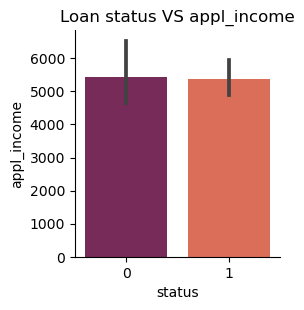

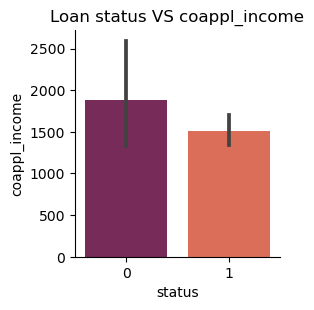

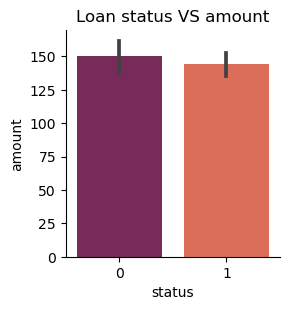

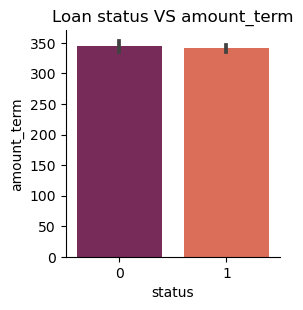

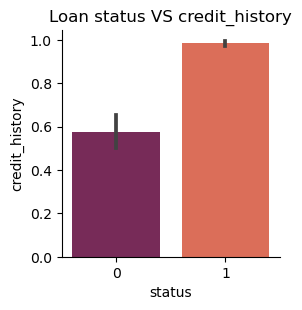

In [123]:
# plot loan status vs numerical features

num=loan_df1.select_dtypes(include=['float','int'])

for i in num.columns[:-1]:
    
    sns.catplot(x='status',y=i, data=loan_df1,kind='bar',height=3,palette='rocket')
    plt.title(f'Loan status VS {i}')
    plt.show()

Observation:  

    Loan approval was not biased on income, loan amount and amount term
    Income of co-applicants did not influence the approval much
    Loan approval was high in applicants with good credit history

In [124]:
# percentage of loans approved for applicants having good/high credit score

cred=loan_df1[loan_df1['credit_history']==1]

cred_approved=len(cred[cred['credit_history']==1])/len(loan_df1)*100

print(f'Loan approval rate for applicants having good/high credit score: {cred_approved:.2f}%')


Loan approval rate for applicants having good/high credit score: 85.48%


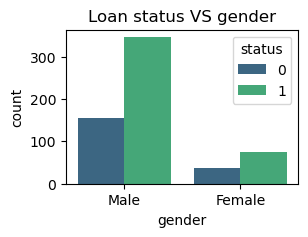

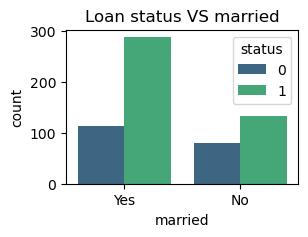

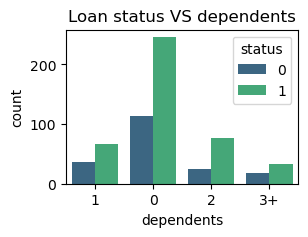

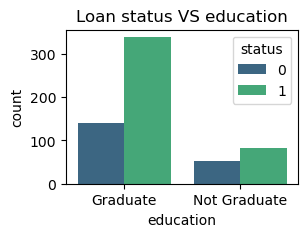

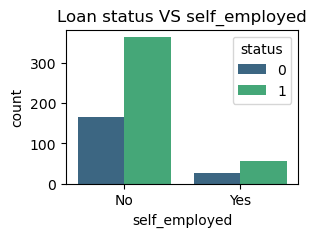

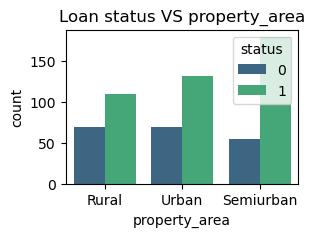

In [125]:
# plot loan status vs categorical features

cat=loan_df1.select_dtypes(include=['object'])

for i in cat.columns:
    plt.figure(figsize=(3,2))
    sns.countplot(x=i,hue='status', data=loan_df1,palette='viridis')
    plt.title(f'Loan status VS {i}')
    plt.show()

Observation:  

    Loan approval rates of applicants was high in people with the following descriptions:
    
    * Male applicants
    * Married applicants 
    * Applicants had no dependants
    * Graduates
    * Self-employed
    * Lived in semi-urban area

In [126]:
# percentage of loans approved for male/female applicants 

male=loan_df1[loan_df1['gender']=='Male']
male_approved=len(male[male['gender']=='Male'])/len(loan_df1)*100

female=loan_df1[loan_df1['gender']=='Female']
female_approved=len(female[female['gender']=='Female'])/len(loan_df1)*100

print(f'Loan approval rate for male applicants: {male_approved:.2f}%')
print(f'Loan approval rate for female applicants: {female_approved:.2f}%')

Loan approval rate for male applicants: 81.73%
Loan approval rate for female applicants: 18.27%


In [127]:
# percentage of loans approved for male/female applicants 

edu=loan_df1[loan_df1['education']=='Graduate']
edu_approved=len(edu[edu['education']=='Graduate'])/len(loan_df1)*100

print(f'Loan approval rate for graduates: {edu_approved:.2f}%')

Loan approval rate for graduates: 78.14%


In [128]:
# encode loan status

for col in cat.columns:
    loan_df1[col]=le.fit_transform(loan_df1[col])
loan_df1.head()

,gender,married,dependents,education,self_employed,appl_income,coappl_income,amount,amount_term,credit_history,property_area,status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


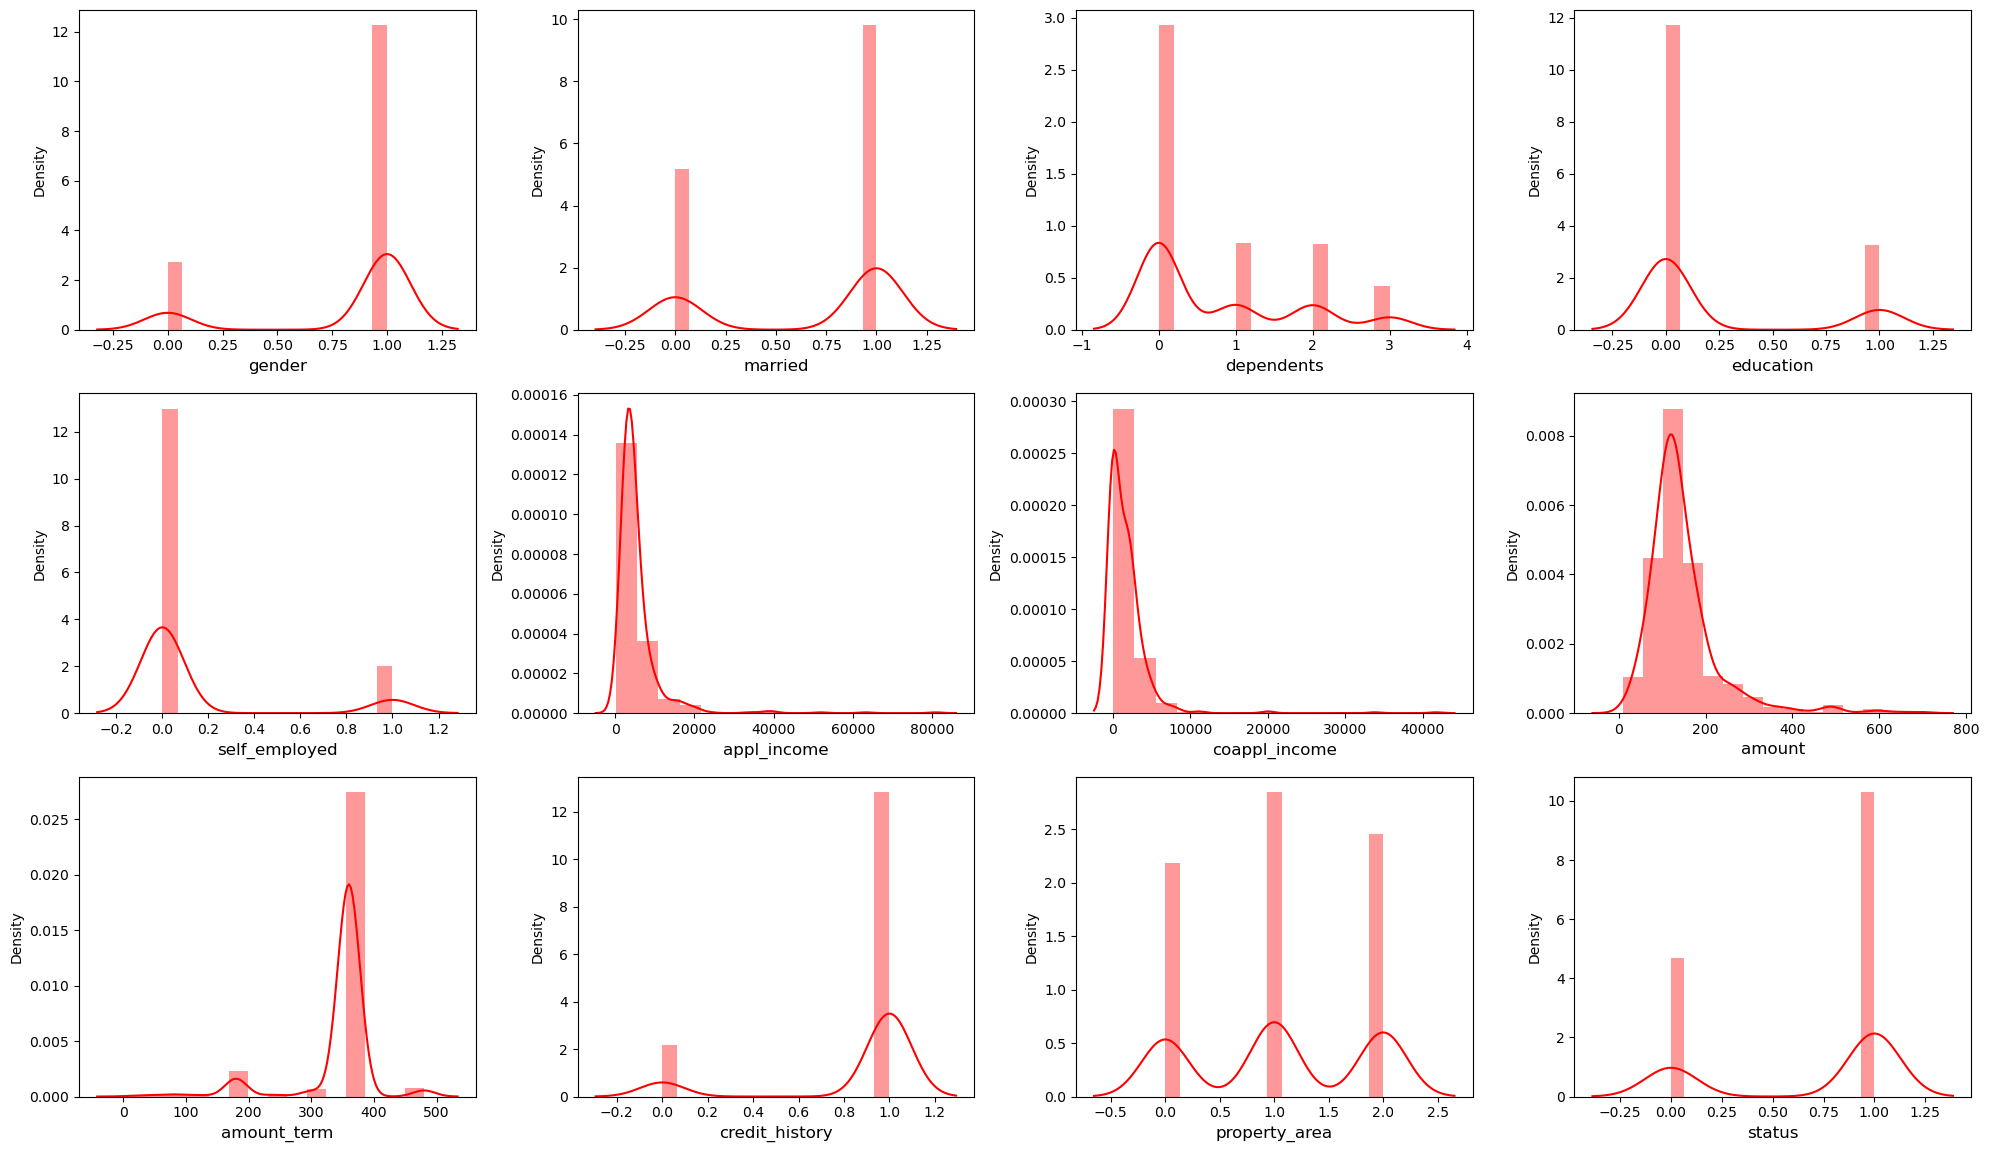

In [129]:
# check data distribution

num=loan_df1.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=12:
        ax=plt.subplot(4,4,plot)
        sns.distplot(loan_df1[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    Applicant income has slight left skewness indicating that majority of applicants have income in the 0-20,000 range
    Co-applicant income lies in the 0-10000 range
    Most of the loan amount owed falls in the range 0-400
    We can check for skewness by skew() method

In [130]:
# check for skewness

num.skew().sort_values(ascending=False)

coappl_income     7.488653
appl_income       6.534654
amount            2.740108
self_employed     2.157034
education         1.365098
dependents        1.013119
property_area    -0.063379
married          -0.649810
status           -0.807437
gender           -1.646215
credit_history   -2.019265
amount_term      -2.399297
dtype: float64

Observation:  

    High skewness exists in coappl_income, appl_income, amount, self_employed, credit_history, amount_term
    As self_employed,  'amount_term' and credit_history have categorical data, we can remove skewness from the other highly skewed features

In [132]:
# skewness removal by cuberoot transformation

for col in ['coappl_income', 'appl_income', 'amount']:
    loan_df1[col]=np.cbrt(loan_df1[col])

    
print('Skewness of data after cuberoot transformation:\n',loan_df1[['coappl_income', 'appl_income', 'amount']].skew().sort_values(ascending=False))

Skewness of data after cuberoot transformation:
 appl_income      1.032638
amount           0.180428
coappl_income   -0.188305
dtype: float64


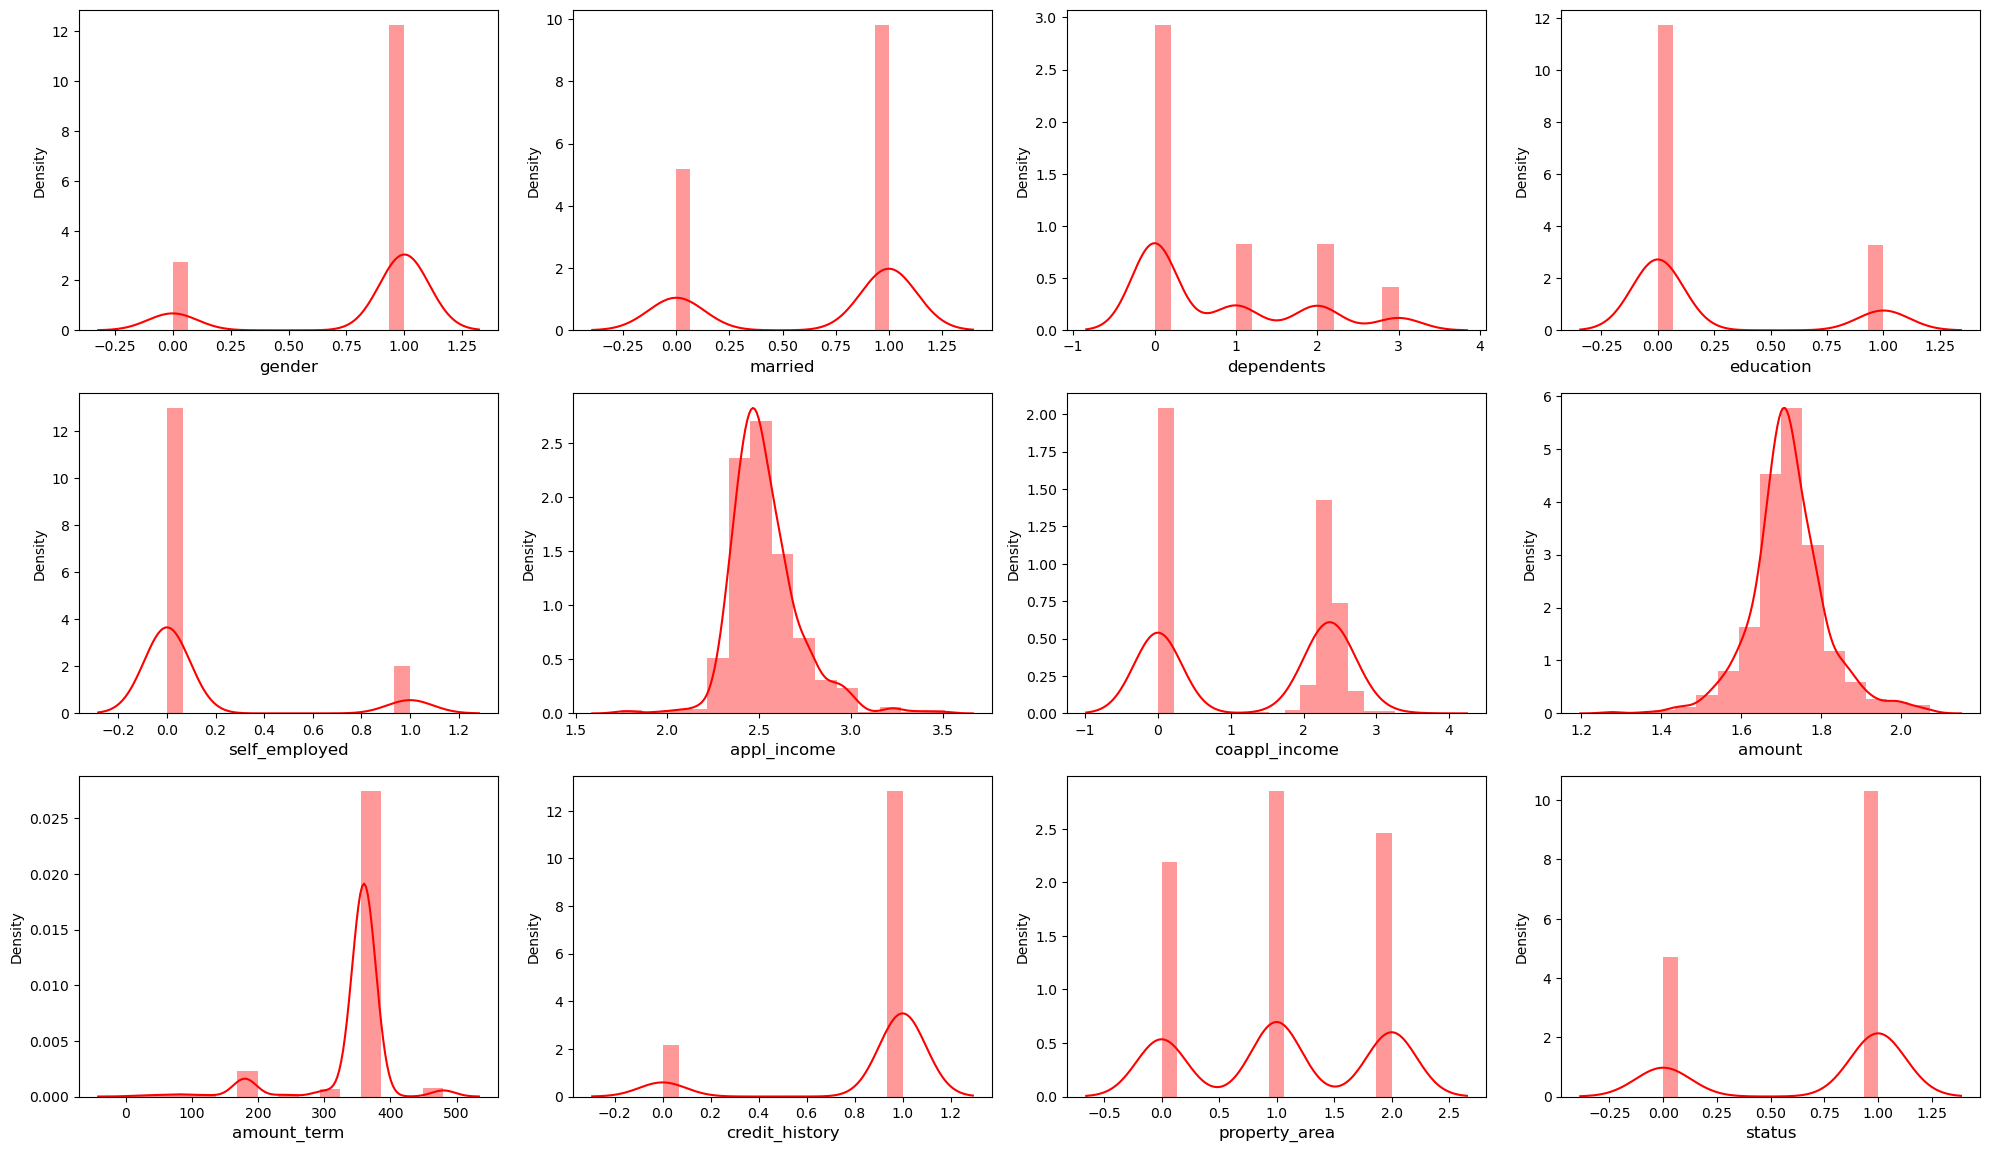

In [133]:
# check data distribution after skewness removal

num=loan_df1.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=12:
        ax=plt.subplot(4,4,plot)
        sns.distplot(loan_df1[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    Skewness of 'coappl_income', 'appl_income', 'amount' has been removed and the data is normally distributed

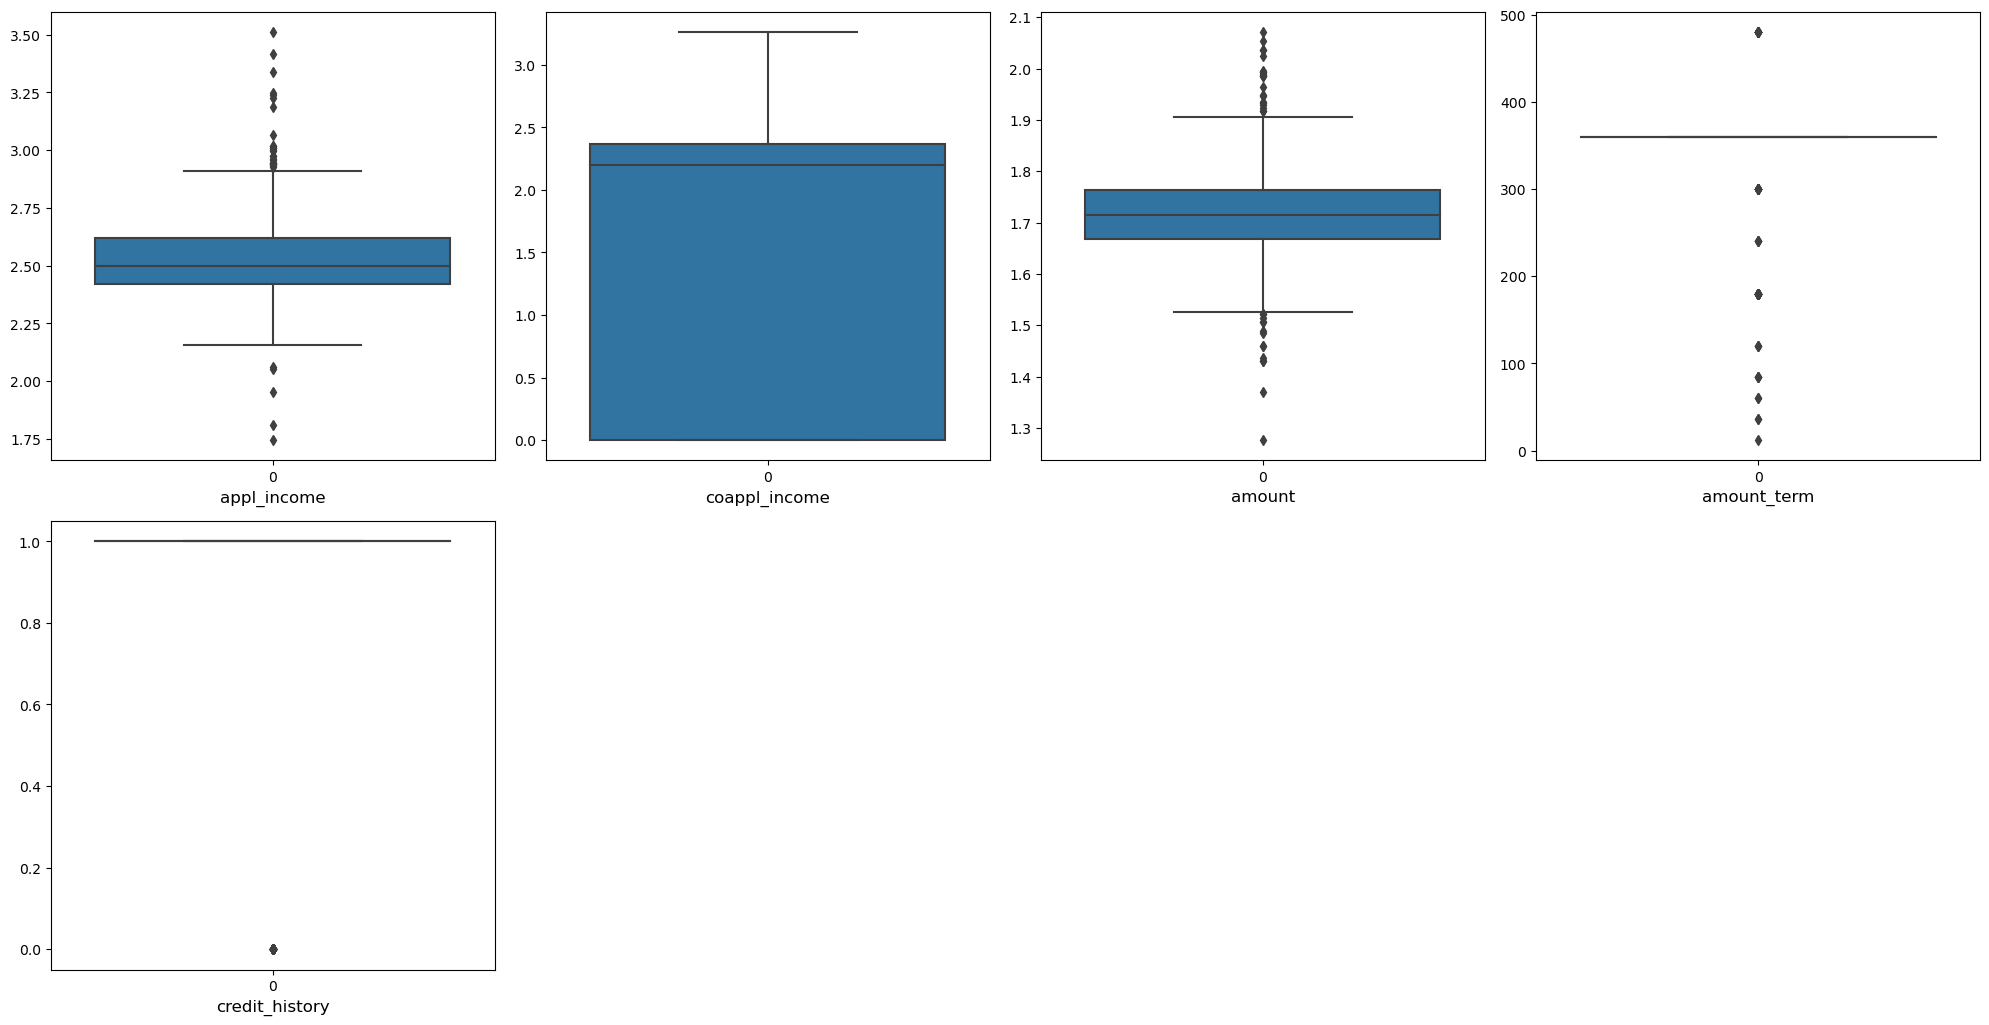

In [137]:
# check for outliers using boxplot

flt=loan_df1.select_dtypes(include=['float'])
plt.figure(figsize=(20,15))
plot=1
for col in flt:
    if plot<=12:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(loan_df1[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    There are few outliers in amount_term, loan amount and applicant income

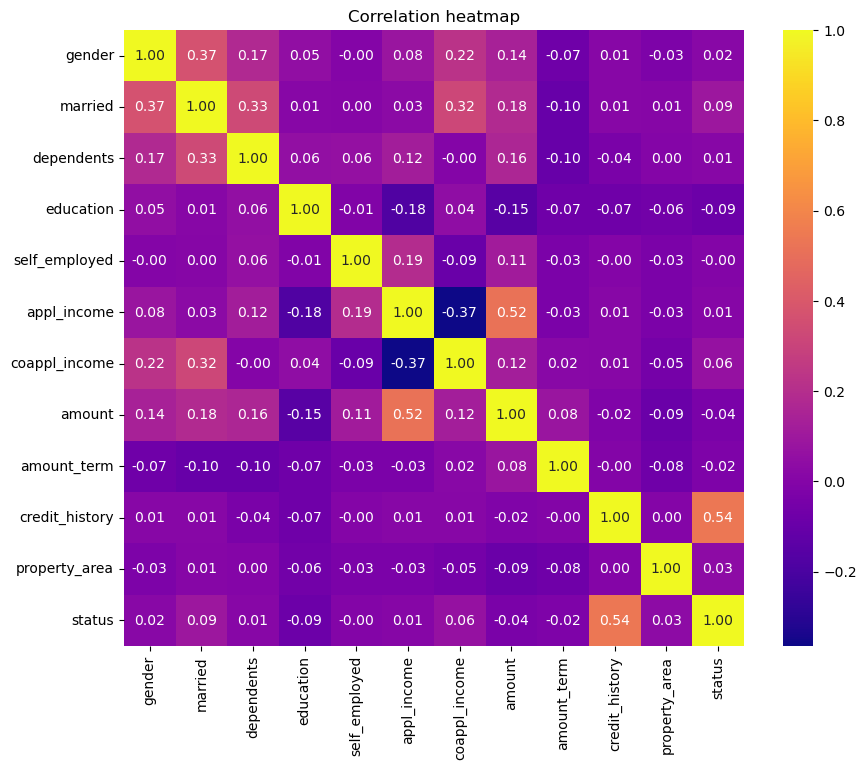

In [138]:
# check for correlation

cm= loan_df1.corr()
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,cmap='plasma',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  

    Loan status is positively correlated with credit history (+0.54) and has no correlation with self-employment feature (0.0)
    Multicollinearity is observed between:
        Loan amount and applicant income (0.52)
        Applicant income and co-applicant income (-0.37) 
        Marriage status with gender (0.37), dependents (0.33) and co-applicant income (0.32) 
        

In [142]:
print('Size of original dataset',loan.shape)
print('Size of dataset after cleaning and pre-processing',loan_df1.shape)
print('Number of rows removed after cleaning and pre-processing',loan.shape[0]-loan_df1.shape[0])

Size of original dataset (613, 13)
Size of dataset after cleaning and pre-processing (613, 12)
Number of rows removed after cleaning and pre-processing 0


# Feature Selection

In [140]:
# confirm multicollinearity by vif 

x=loan_df1.drop(['status'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
5,appl_income,1.940599
7,amount,1.678539
6,coappl_income,1.565584
1,married,1.397725
0,gender,1.205678
2,dependents,1.178290
3,education,1.068942
8,amount_term,1.049030
4,self_employed,1.043394
10,property_area,1.024202


Observation:  

    As VIF scores are less than 5, the multicollinearity is confirmed to be minimal. So we can proceed with the data as such.

In [188]:
# select top 10 features using SelectKBest

x=loan_df1.drop(['status'],axis=1) 
y=loan_df1['status']

best=SelectKBest(score_func=f_classif,k=10)
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
selected_features=selectkbest.sort_values(by='Score',ascending=False).head(7)
display(selected_features)

,Features,Score
9,credit_history,252.004952
1,married,5.349778
3,education,4.483951
6,coappl_income,2.500876
7,amount,0.911369
10,property_area,0.580734
8,amount_term,0.319450


We can select the top 7 best features for model training

In [189]:
# splitting data into features(x) and label(y)

x=loan_df1[['credit_history','married','education','coappl_income','amount','property_area','amount_term']]
y=loan_df1['status']

In [190]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(459, 7) (459,) (154, 7) (154,)


In [191]:
# check for imbalance in the dataset

status_count=loan_df1['status'].value_counts()
pd.DataFrame(status_count)

,count
status,
1,421
0,192


Observation:  

    There is significant imbalance in the label column. So we can use oversampling to bring balance to the data.
    

In [192]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

In [193]:
# check label distribution before and after oversampling
from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({1: 314, 0: 145}) 

Label distribution after oversampling:  Counter({1: 314, 0: 314})


In [194]:
# check shape of train and test sets before and after oversampling

print('No. of feature data b/f smote: ', x_train.shape,'and No. of label data b/f smote: ',y_train.shape,'\n')

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data b/f smote:  (459, 7) and No. of label data b/f smote:  (459,) 

No. of feature data a/f smote:  (628, 7) and no. of label data a/f smote:  (628,)


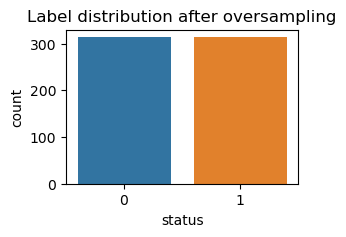

In [195]:
# visualize label distribution after oversampling

ytrain_df=pd.DataFrame(Y_train,columns=['status'])
plt.figure(figsize=(3,2))
sns.countplot(x='status', data=ytrain_df)
plt.title('Label distribution after oversampling')
plt.show()

Observation:  
 
    Now the dataset is balanced, and can be used for model building

# MODEL BUILDING & VALIDATION

In [196]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Glass Type')
        plt.ylabel('Actual Glass Type')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.7245222929936306
Accuracy of test set:  0.7662337662337663

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.67      0.47      0.55        47
           1       0.79      0.90      0.84       107

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.75      0.77      0.75       154



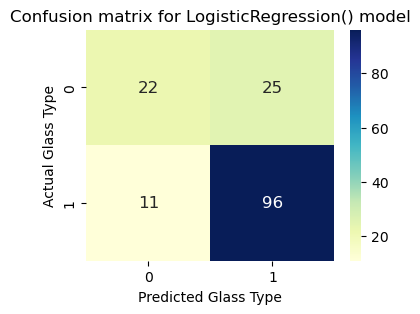


Cross validation score of the LogisticRegression() model : 0.8092363054778089


In [197]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.8343949044585988
Accuracy of test set:  0.6948051948051948

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.50      0.70      0.58        47
           1       0.84      0.69      0.76       107

    accuracy                           0.69       154
   macro avg       0.67      0.70      0.67       154
weighted avg       0.74      0.69      0.71       154



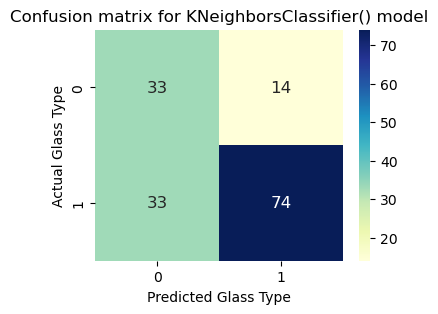


Cross validation score of the KNeighborsClassifier() model : 0.7618286018925763


In [198]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,x_test,y_test,train=True)
score(knn,X_train,Y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  0.9952229299363057
Accuracy of test set:  0.6233766233766234

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.41      0.51      0.45        47
           1       0.76      0.67      0.71       107

    accuracy                           0.62       154
   macro avg       0.58      0.59      0.58       154
weighted avg       0.65      0.62      0.63       154



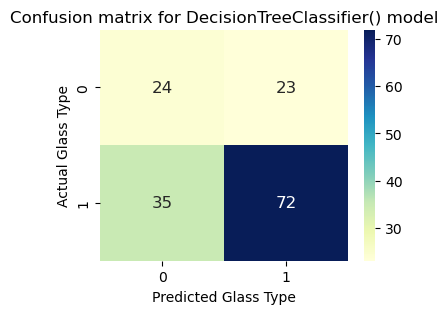


Cross validation score of the DecisionTreeClassifier() model : 0.7032253765160602


In [199]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  0.9952229299363057
Accuracy of test set:  0.6883116883116883

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.49      0.57      0.53        47
           1       0.80      0.74      0.77       107

    accuracy                           0.69       154
   macro avg       0.64      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154



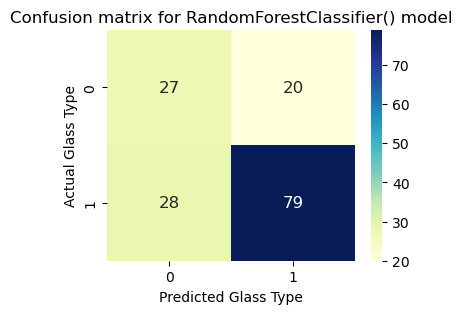


Cross validation score of the RandomForestClassifier() model : 0.7569772091163535


In [200]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.7563694267515924
Accuracy of test set:  0.7922077922077922

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.78      0.45      0.57        47
           1       0.80      0.94      0.86       107

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154



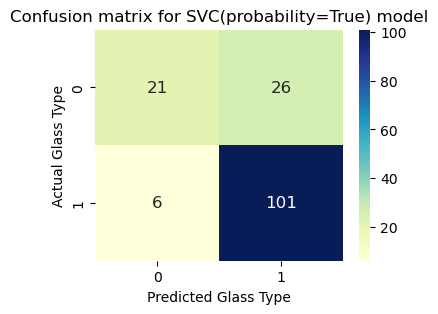


Cross validation score of the SVC(probability=True) model : 0.686791949886712


In [201]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.8662420382165605
Accuracy of test set:  0.7467532467532467

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.60      0.51      0.55        47
           1       0.80      0.85      0.82       107

    accuracy                           0.75       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



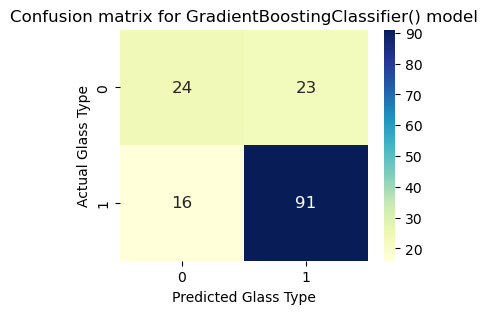


Cross validation score of the GradientBoostingClassifier() model : 0.7896707983473277


In [202]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  0.9872611464968153
Accuracy of test set:  0.6818181818181818

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.48      0.53      0.51        47
           1 

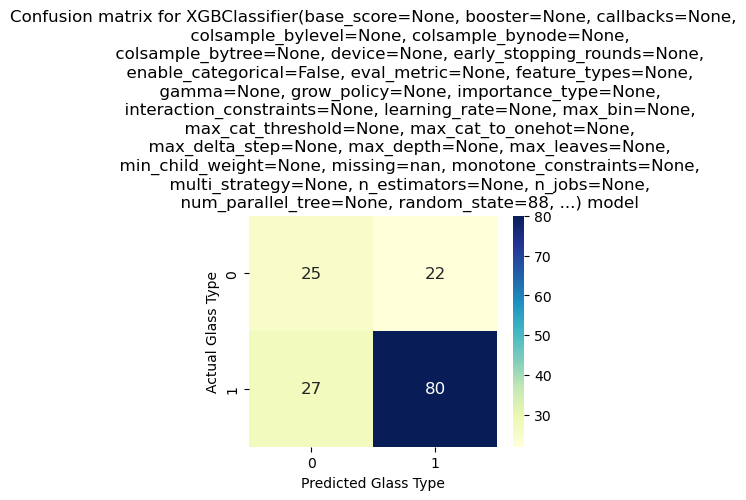


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.7308010129281621


In [203]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

F1 score of Logistic Regression model is  0.8421052631578947
F1 score of Decision Tree model is  0.7184466019417476
F1 score of KNN model is  0.758974358974359
F1 score of Random Forest model is  0.7692307692307693
F1 score of SVC model is  0.8632478632478633
F1 score of Gradient Boosting model is  0.823529411764706
F1 score of XGBoosting model is  0.7655502392344498


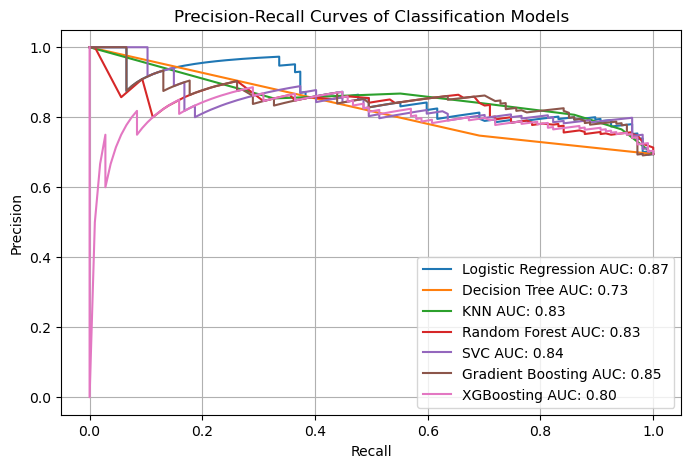

In [204]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoosting':xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    We select SVM Classifier (svc) as the best model with the highest test accuracy (0.79) and highest F1 score (0.86) indicating that the model can classify loan status better than other models. The model shows:-
    
        Accuracy of train set:  0.756
        Accuracy of test set:  0.792
        Cross validation score : 0.686
        F1 score : 0.863
        AUC : 0.84
        
        There is minimal overfitting in the SVM Classifier model as the train and test accuracy are closer values.
        Number of False Negatives are also lesser in comparison to the other models

In [224]:
# Hyperparameter tuning of the selected model (SVM Classifier) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}

rs=RandomizedSearchCV(estimator=SVC(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for SVM model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for SVM model: {'gamma': 1, 'C': 1} and best score is : 0.7565079365079365


Accuracy of train set:  0.8455414012738853
Accuracy of test set:  0.7207792207792207

Classification report of SVC(C=1, gamma=1, probability=True) model  :

               precision    recall  f1-score   support

           0       0.54      0.62      0.57        47
           1       0.82      0.77      0.79       107

    accuracy                           0.72       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.72      0.73       154



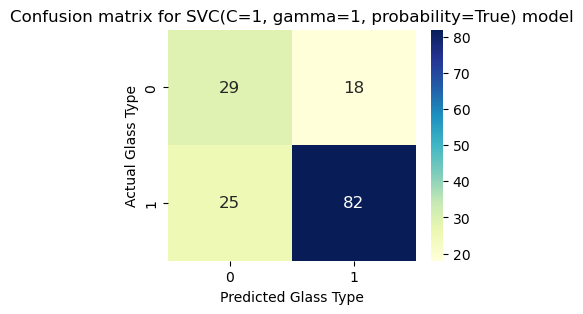


Cross validation score of the SVC(C=1, gamma=1, probability=True) model : 0.7977875516460082


In [225]:
# Tuned SVM Classifier (with manual tuning also done)

svc1=SVC(probability=True,C= 1, gamma= 1)
svc1.fit(X_train,Y_train)

score(svc1,X_train,Y_train,x_test,y_test,train=True)
score(svc1,X_train,Y_train,x_test,y_test,train=False)

cv(svc1)

F1 score of Untuned SVM model is  0.8632478632478633
F1 score of Tuned SVM model is  0.7922705314009661


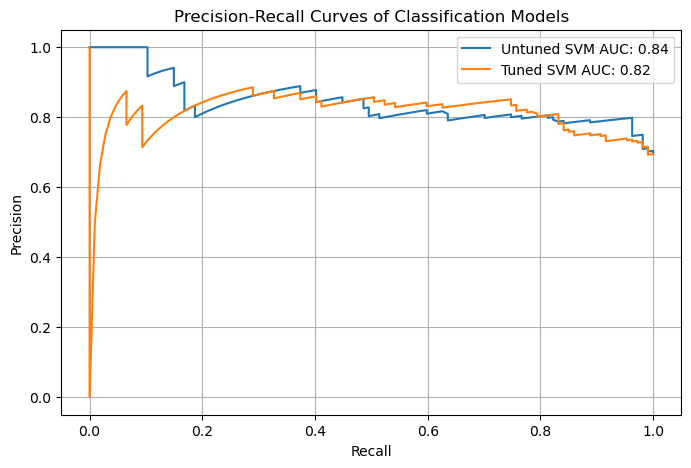

In [227]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Untuned SVM': svc,'Tuned SVM': svc1}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    Even though there has been improvement in train accuracy and cross-validation score, the test accuracy and F1 score of the model has reduced after hyperparameter tuning. Tuned model also classified more false negatives. So we'll proceed with the untuned SVM model model having:
    
        Accuracy of train set:  0.756
        Accuracy of test set:  0.792
        Cross validation score : 0.686
        F1 score : 0.863
        AUC : 0.84

        There is minimal overfitting in the untuned SVM model and the number of False Negatives are also lesser.

In [228]:
# Save random forest model

pickle.dump(svc, open('Loan_status_prediction_svm_model.pkl','wb'))

In [231]:
# load model and view prediction vs actual loan_status

Loan_status_prediction_model=pickle.load(open('Loan_status_prediction_svm_model.pkl','rb'))
y_pred=Loan_status_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.tail()

,Predicted,Actual
181,1,1
104,1,1
214,1,1
179,0,0
591,1,1


Observation:  

    The Support Vector Machine model (svc) was able to predict the approval of loan by applicants based on many features with 79% test accuracy.

# Overall Summary

The dataset on "Loan Application Status" was used to analyse and build machine learning models to predict whether the loan of the applicant will be approved (Loan_status) or not, on the basis of the details provided in the dataset(Classification model).

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, renaming of columns, outlier removal, managing skewness 
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering -  scaling of data,categorical encoding, cuberoot transformation to manage skewness
4. Model training and evaluation- trained 7 models for the classification problem; evaluated the models using appropriate metrics to find the best model


# Data Insights

    DESCRIPTIVE ANALYSIS:

    The data consists of data of 614 unique loan applicants
    Dataset represents male population more than female
    Majority loan applicants are married
    344 loan applicants doesnt have any dependancies
    479 loan applicants are graduates
    272 of the loan applicants doesnot have any income
    120.0 is the most common loan amount and common amount term is 360 
    Majority of the loan applicants (474) have good credit history 
    Most loan applicants live in the Semi-urban area
    Average loan applicant income is 5402.73
    Average coapplicant income is 1623.89
    Average loan amount is 146.41
    Average loan amount term is 341.96


    INFERENTIAL ANALYSIS:
    
    Highest loan amount was availed by applicant number LP001585. He had good credit score and high income of 51763 and his loan was approved.
    Lowest loan amount was vailed by applicant number LP002840 and low income of 2378. Despite having good credit score, her loan was not approved.
    
    Loan approval was not biased on income, loan amount and amount term
    
    Income of co-applicants did not influence the approval much
    
    Loan approval rate is 85.48% for applicants with good/high credit score
    
    Loan approval rates of applicants was high in people with the following descriptions:

    * Gender: Loan approval rate for male applicants is 81.73% and female applicants is 18.27%
    * Education: Loan approval rate for graduates is 78.14%
    * Marital status: Married applicants had higher approval rates 
    * Dependants: Applicants with zero dependants had higher approval rates 
    * Employment: Self-employed applicants had higher approval rates
    * Location: Applicants living in semi-urban area had higher approval rates



# Selected model


    SVM Classifier model was found to be the best model for the classification task to predict the loan application status. The model was selected based on below metrics:

        Accuracy of train set:  0.756
        Accuracy of test set:  0.792
        Cross validation score : 0.686
        F1 score : 0.863
        AUC : 0.84

        There is minimal overfitting in the SVM model as the train and test accuracy are closer values. Number of False Negatives are also lesser.
   